In [1]:
# import depndencies
import psycopg2
import pandas as pd
from config import username, password, host
import matplotlib.pyplot as plt

In [2]:
# sqlalchemy import
from sqlalchemy import create_engine

In [3]:
# create engines, connection
engine = create_engine(f'postgresql://{username}:{password}@{host}/hw_9_db')
conn = engine.connect()

In [4]:
# create salary dataframe from database
data_salary = pd.read_sql("select * from salaries", conn)

In [5]:
#d isplay for refercne
data_salary.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [18]:
# check salary for interesting info
data_salary['salary'].value_counts()

40000     95346
55581        19
53738        18
53078        18
44564        17
          ...  
106308        1
80494         1
108684        1
74935         1
90395         1
Name: salary, Length: 50355, dtype: int64

In [6]:
# create bins - note there are lots of salaries at exactly $40,000
bins = [40000, 42000, 45000, 50000, 60000, 70000, 80000, 90000, 100000, 120000]

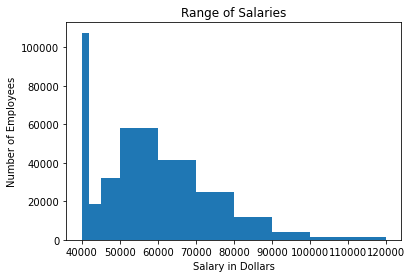

In [7]:
# plot histogram of salary bins
plt.hist(data_salary['salary'], bins = bins)
plt.xlabel("Salary in Dollars")
plt.ylabel("Number of Employees")
plt.title("Range of Salaries")
plt.show()

In [8]:
#create titles DF from database
data_titles = pd.read_sql("select * from titles", conn)
data_titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [9]:
# rename columns
data_titles = data_titles.rename(columns={"title_id": "emp_title_id"})
data_titles

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [10]:
# create empolyee DF from database
data_employees = pd.read_sql("select * from employee", conn)
data_employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [11]:
# merge first two DFs
emp_sal = pd.merge(data_employees, data_salary, on="emp_no")
emp_sal.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [12]:
# merge all DFs so have one DF that allows to plot bar chart of salaries
emp_sal_title = pd.merge(emp_sal, data_titles, on = "emp_title_id")
emp_sal_title

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,72446,Manager
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,71148,Manager
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,60026,Manager
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,40000,Manager


In [13]:
# group DF by title to see average salary
sal_avg = emp_sal_title.groupby('title').mean()
sal_avg = sal_avg.drop(['emp_no'], axis=1)
sal_avg

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


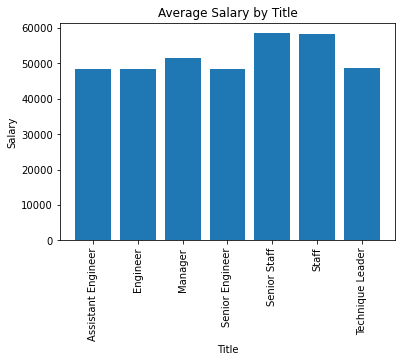

In [17]:
#plot bar chart
plt.bar(sal_avg.index,sal_avg['salary'])
plt.xlabel("Title")
plt.ylabel("Salary")
plt.title("Average Salary by Title")
plt.xticks(rotation=90)
plt.show()